# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Import data and Cleaning raw data

In [2]:
# Import and showing data
data = pd.read_csv('loan_data_2007_2014.csv')

data.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Fill Null Data
data['emp_title'] = data['emp_title'].fillna('Unknown')
data['emp_length'] = data['emp_length'].fillna('1')
data['desc'] = data['desc'].fillna('None')
data['title'] = data['title'].fillna('Unknown')
data['delinq_2yrs'] = data['delinq_2yrs'].fillna(data['delinq_2yrs'].mean())
data['earliest_cr_line'] = data['earliest_cr_line'].fillna('-')
data['inq_last_6mths'] = data['inq_last_6mths'].fillna(data['inq_last_6mths'].mean())
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].fillna(data['mths_since_last_delinq'].mean())
data['mths_since_last_record'] = data['mths_since_last_record'].fillna(data['mths_since_last_record'].mean())
data['open_acc'] = data['open_acc'].fillna(data['open_acc'].mean())
data['pub_rec'] = data['pub_rec'].fillna(data['pub_rec'].mean())
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].mean())
data['total_acc'] = data['total_acc'].fillna(data['total_acc'].mean())
data['last_pymnt_d'] = data['last_pymnt_d'].fillna('-')
data['next_pymnt_d'] = data['next_pymnt_d'].fillna('-')
data['last_credit_pull_d'] = data['last_credit_pull_d'].fillna('-')
data['collections_12_mths_ex_med'] = data['collections_12_mths_ex_med'].fillna(data['collections_12_mths_ex_med'].mean())
data['mths_since_last_major_derog'] = data['mths_since_last_major_derog'].fillna(data['mths_since_last_major_derog'].mean())
data['last_pymnt_d'] = data['last_pymnt_d'].fillna('-')
data['acc_now_delinq'] = data['acc_now_delinq'].fillna(data['acc_now_delinq'].mean())
data['tot_coll_amt'] = data['tot_coll_amt'].fillna(data['tot_coll_amt'].mean())
data['tot_cur_bal'] = data['tot_cur_bal'].fillna(data['tot_cur_bal'].mean())
data['total_rev_hi_lim'] = data['total_rev_hi_lim'].fillna(data['total_rev_hi_lim'].mean())

In [4]:
# Changing data types
data['term'] = data.term.str[:3]
data.term = pd.to_numeric(data.term)
data['emp_length'] = data['emp_length'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
data['annual_inc'] = data['annual_inc'].fillna(data['annual_inc'].mean())
data.emp_length = pd.to_numeric(data.emp_length).astype('int64')
data['annual_inc'] = pd.to_numeric(data['annual_inc']).astype('int64')
data.inq_last_6mths = pd.to_numeric(data.inq_last_6mths)
data.mths_since_last_delinq = pd.to_numeric(data.mths_since_last_delinq)
data.mths_since_last_record = pd.to_numeric(data.mths_since_last_record)
data.open_acc = pd.to_numeric(data.open_acc).astype('int64')
data.pub_rec = pd.to_numeric(data.pub_rec).astype('int64')
data.revol_util = pd.to_numeric(data.revol_util)
data.total_acc = pd.to_numeric(data.total_acc).astype('int64')
data.collections_12_mths_ex_med = pd.to_numeric(data.collections_12_mths_ex_med).astype('int64')
data.mths_since_last_major_derog = pd.to_numeric(data.mths_since_last_major_derog).astype('int64')
data.tot_coll_amt = pd.to_numeric(data.tot_coll_amt).astype('int64')
data.tot_cur_bal = pd.to_numeric(data.tot_cur_bal).astype('int64')


In [5]:
# New data
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,Unknown,10,RENT,24000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,34.10443,74.306012,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,-,Jan-16,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,34.10443,74.306012,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,-,Sep-13,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,Unknown,10,RENT,12252,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,34.10443,74.306012,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,-,Jan-16,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.00000,74.306012,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,-,Jan-15,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.00000,74.306012,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN


# Data Analysis

In [6]:
print(f'''Ada sebanyak {data.id.count()} id yang terdaftar, Dengan rata-rata sebesar pinjaman sebesar {round(data.loan_amnt.mean(),2)},
Dan total pinjaman sebanyak ${data.loan_amnt.count()} untuk rata-rata masa pinjaman selama {round(data.term.mean(),2)} bulan, Dengan bunga rata-rata sebesar {round(data.int_rate.mean(),2)}%.

Ada sebanyak {data.grade.nunique()} Grade berupa {sorted(data.grade.unique())}.

Peminjam memiliki {data.home_ownership.nunique()} status kepemilikan rumah, yaitu: {data.home_ownership.unique()},
Dengan rata-rata total pendapatan pertahun sebesar ${round(data.annual_inc.mean(),2)}.

Untuk status verifikasi sendiri ada {data.verification_status.nunique()}, yaitu: {data.verification_status.unique()},
Dan untuk status pinjaman ada {data.loan_status.nunique()}, yang terdiri dari: {sorted(data.loan_status.unique())}.

Ada sebanyak {data.purpose.nunique()} alasan peminjam untuk meminjam, yaitu: {sorted(data.purpose.unique())}.

Data peminjam tersebar di {data.addr_state.nunique()} wilayah Amerika Serikat, dengan rasio DTI di angka {round(data.dti.mean(),2)}.

Kemudian terdapat {data.application_type.nunique()} jenis pengajuan kredit yang berupa {data.application_type.unique()}.

Dan yang terakhir adalah jumlah pinjaman yang telah dibayar adalah sebesar ${data.total_pymnt.count()}.
''')

Ada sebanyak 466285 id yang terdaftar, Dengan rata-rata sebesar pinjaman sebesar 14317.28,
Dan total pinjaman sebanyak $466285 untuk rata-rata masa pinjaman selama 42.61 bulan, Dengan bunga rata-rata sebesar 13.83%.

Ada sebanyak 7 Grade berupa ['A', 'B', 'C', 'D', 'E', 'F', 'G'].

Peminjam memiliki 6 status kepemilikan rumah, yaitu: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY'],
Dengan rata-rata total pendapatan pertahun sebesar $73277.38.

Untuk status verifikasi sendiri ada 3, yaitu: ['Verified' 'Source Verified' 'Not Verified'],
Dan untuk status pinjaman ada 9, yang terdiri dari: ['Charged Off', 'Current', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid', 'In Grace Period', 'Late (16-30 days)', 'Late (31-120 days)'].

Ada sebanyak 14 alasan peminjam untuk meminjam, yaitu: ['car', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 

# Data Visualization

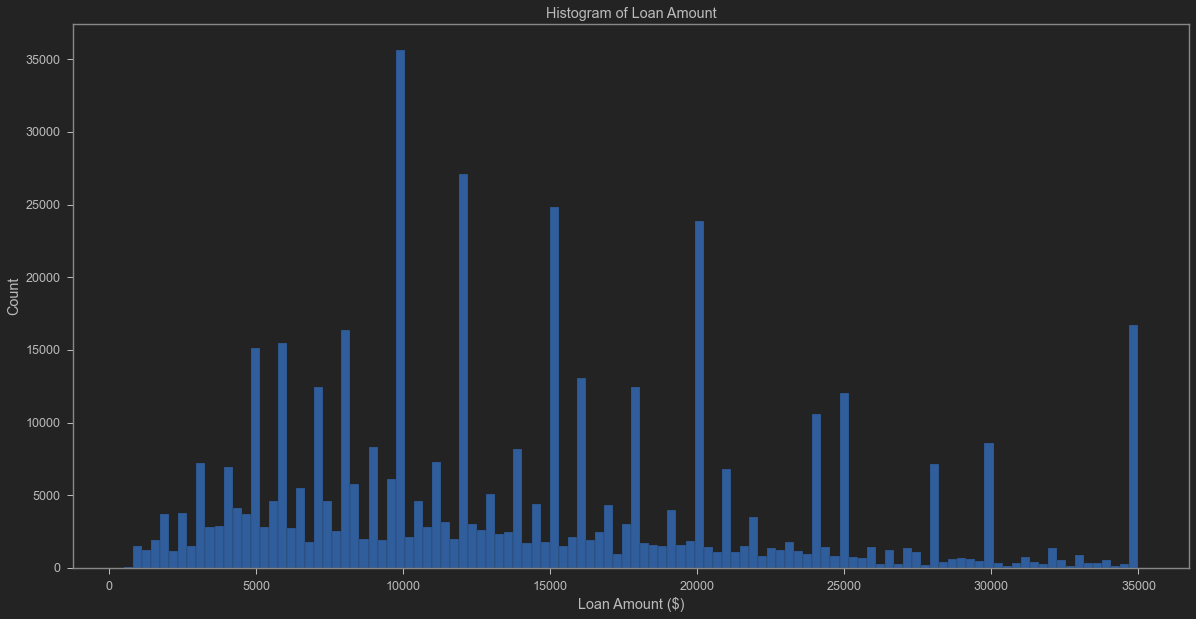

In [7]:
plt.figure(figsize=(20,10))
sns.histplot(data.loan_amnt,color='b',palette='Spectral')
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.savefig("Histogram of Loan Amount.png")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


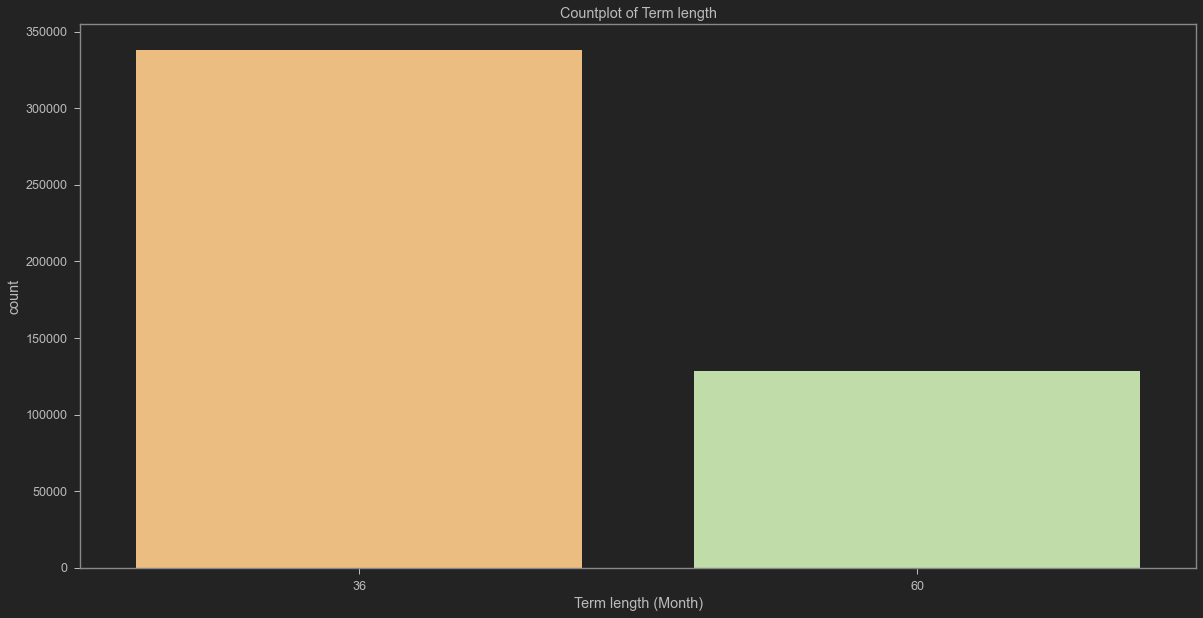

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(data.term,color='b',palette='Spectral')
plt.title('Countplot of Term length')
plt.xlabel('Term length (Month)')
plt.savefig("Countplot of Term length.png")
plt.show()

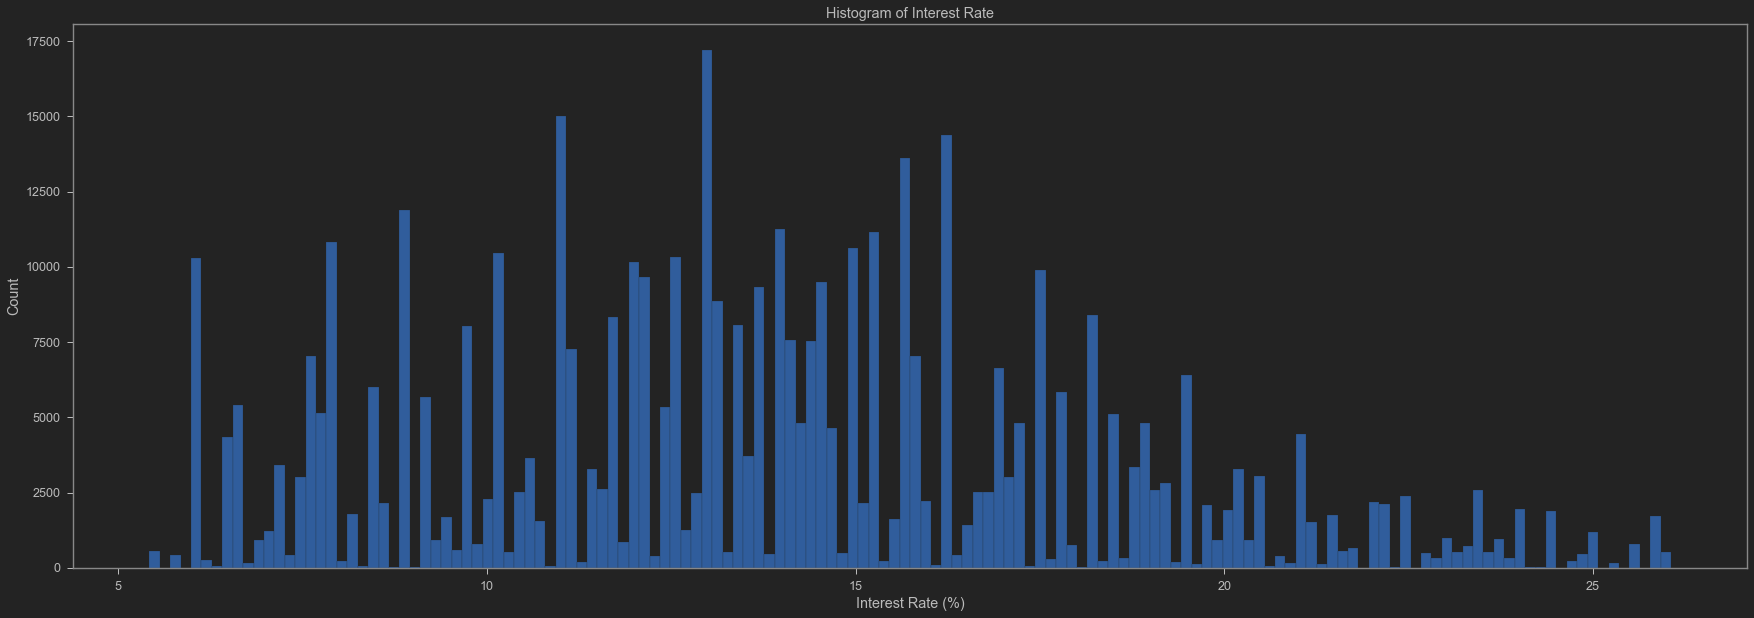

In [9]:
plt.figure(figsize=(30,10))
sns.histplot(data.int_rate,color='b',palette='Spectral')
plt.title('Histogram of Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.savefig("Histogram of Interest Rate.png")
plt.show()

No handles with labels found to put in legend.


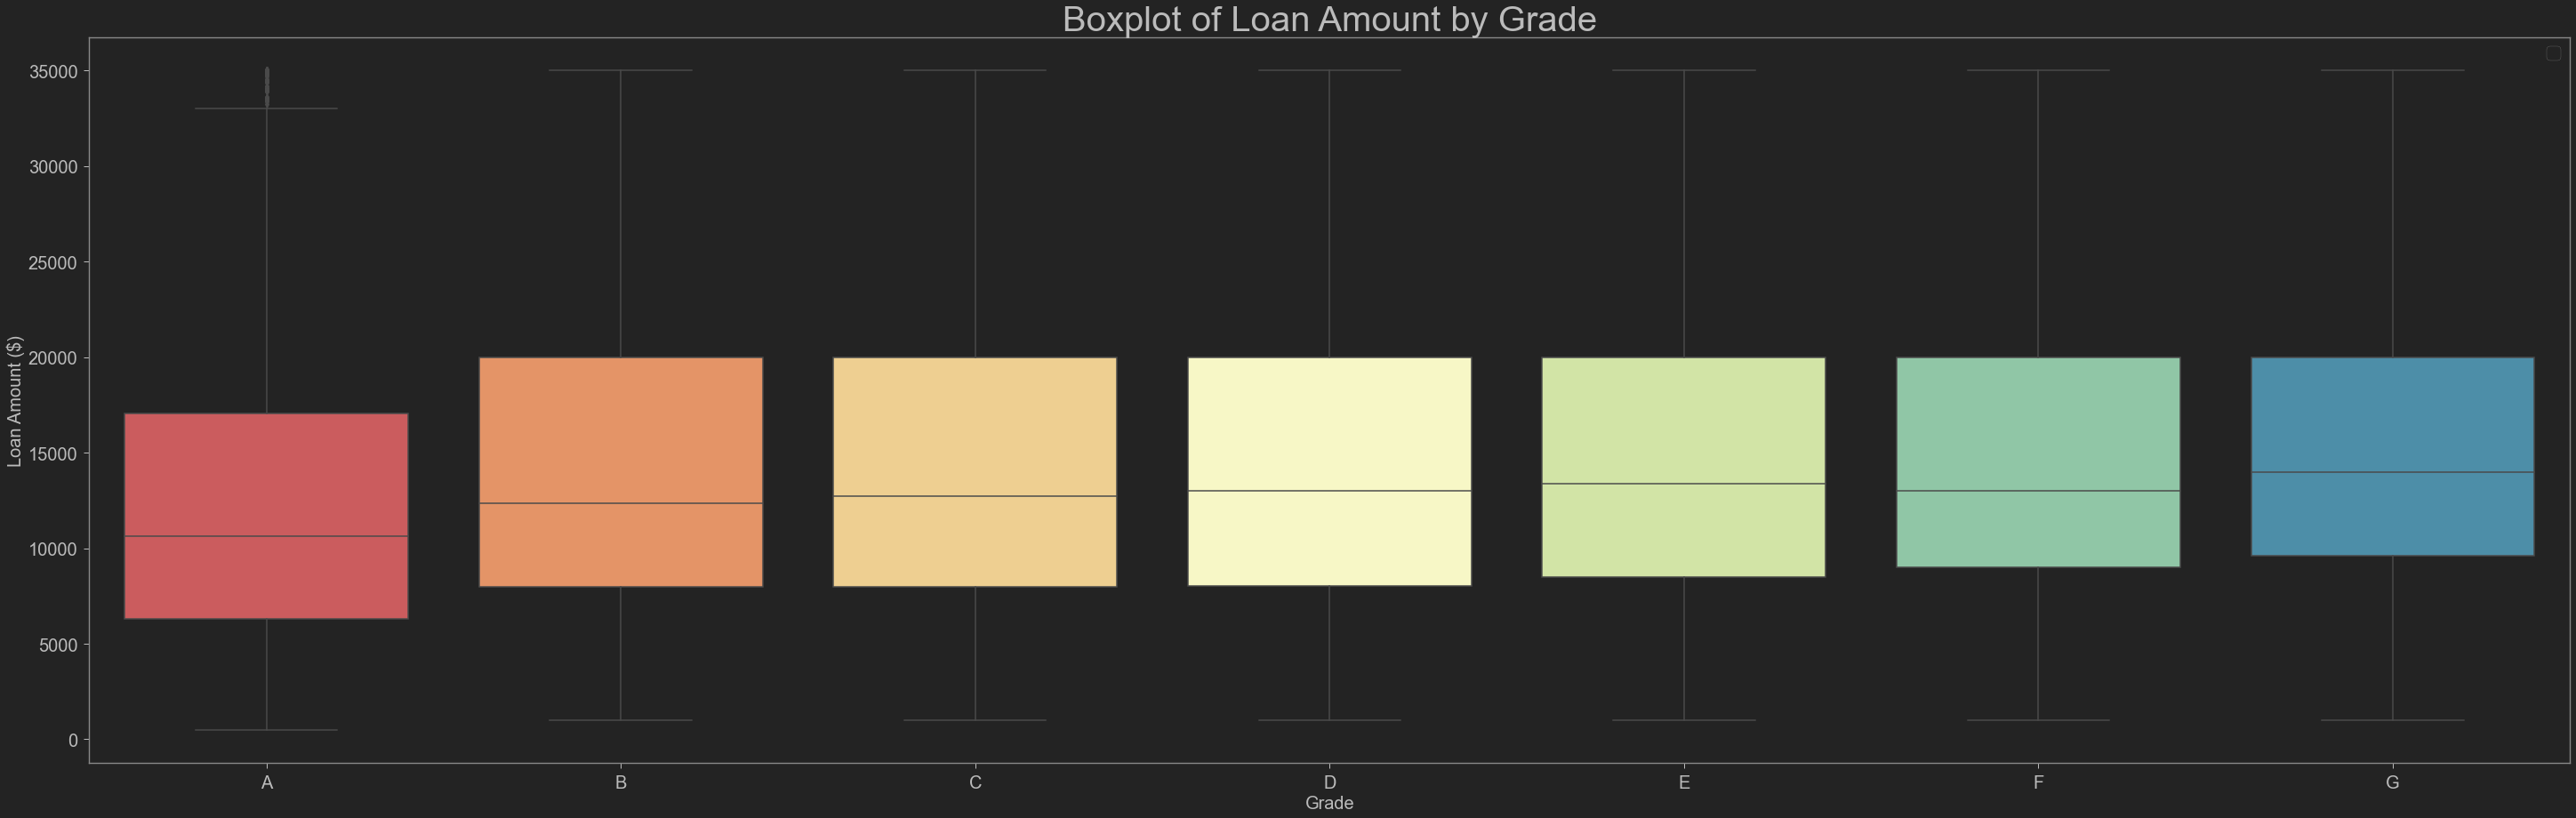

In [10]:
plt.figure(figsize=(50,15))
sns.boxplot(y=data.loan_amnt,x=sorted(data.grade),palette='Spectral')
plt.title('Boxplot of Loan Amount by Grade',fontsize=40)
plt.xlabel('Grade',fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(fontsize=20)
plt.ylabel('Loan Amount ($)',fontsize=20)
plt.savefig("Boxplot of Loan Amount by Grade.png")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


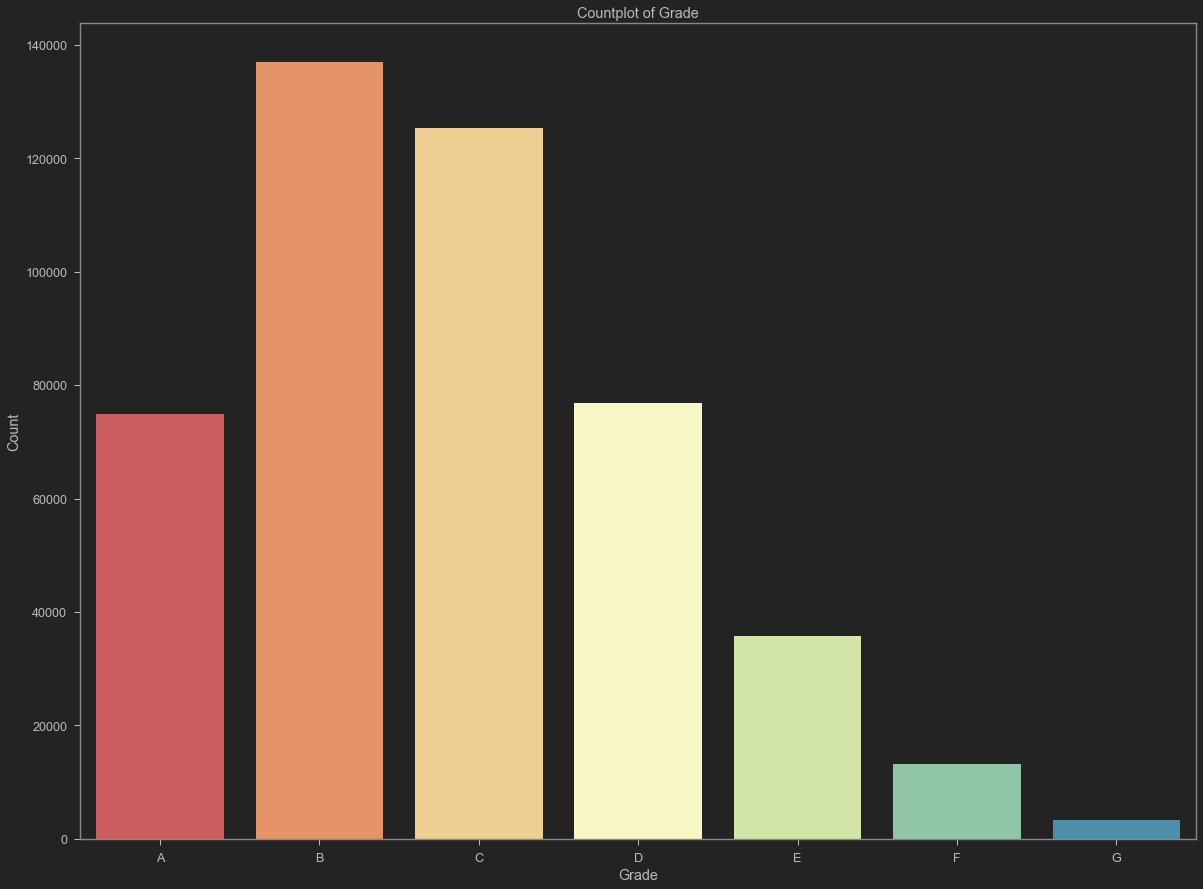

In [11]:
plt.figure(figsize=(20,15))
sns.countplot(sorted(data.grade),palette='Spectral')
plt.title('Countplot of Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.savefig("Countplot of Grade.png")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


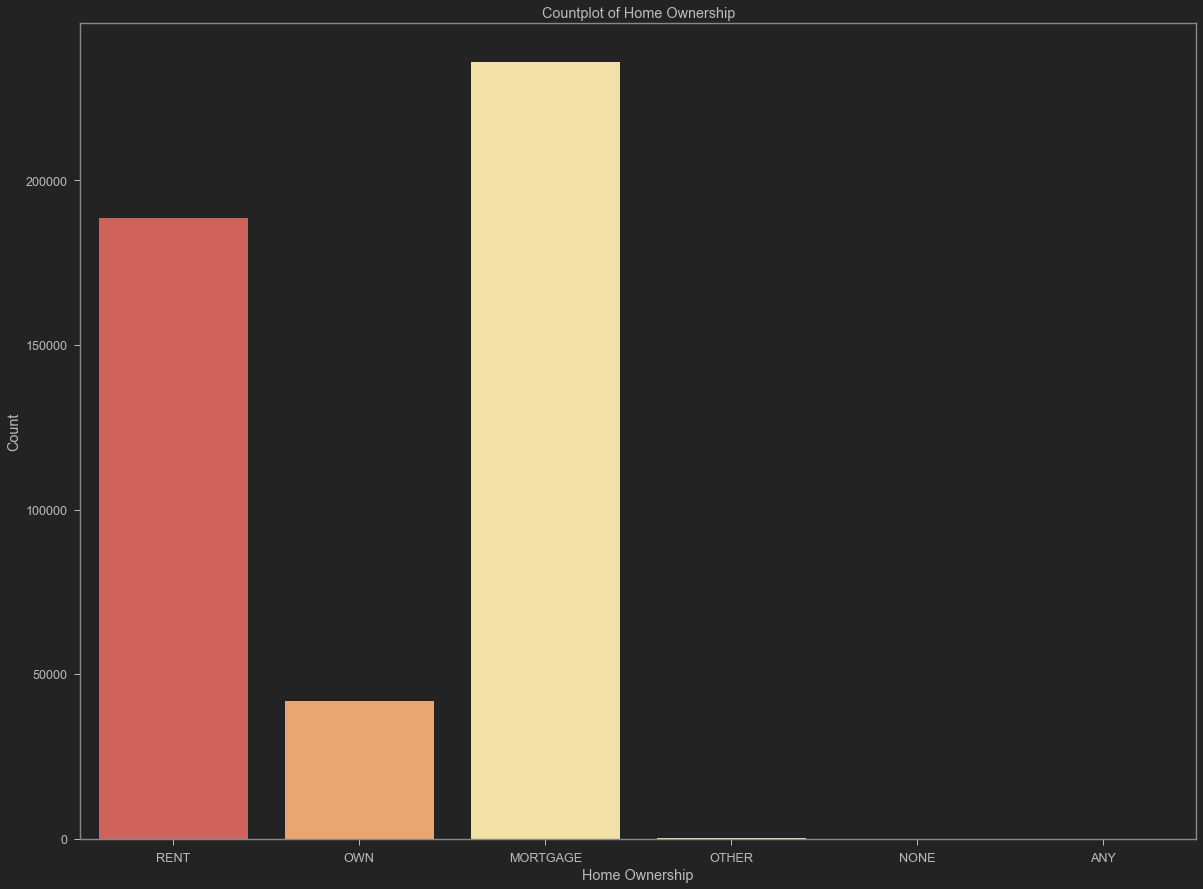

In [12]:
plt.figure(figsize=(20,15))
sns.countplot(data.home_ownership,palette='Spectral')
plt.title('Countplot of Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.savefig("Countplot of Home Ownership.png")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


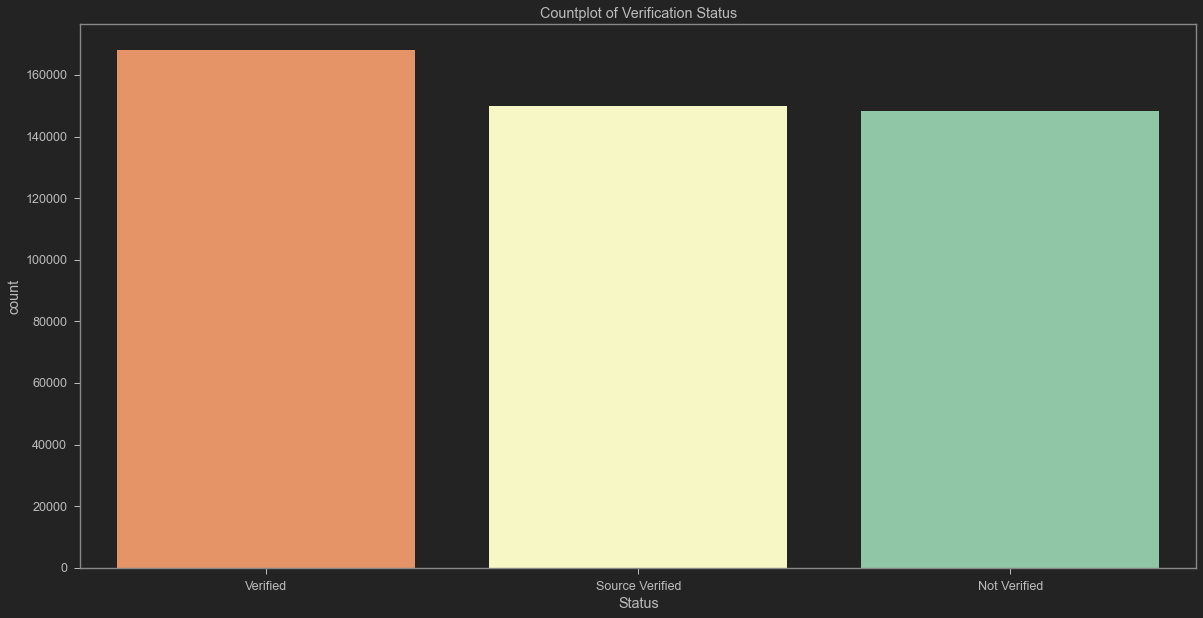

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(data.verification_status,palette='Spectral')
plt.title('Countplot of Verification Status')
plt.xlabel('Status')
plt.savefig("Countplot of Verification Status.png")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


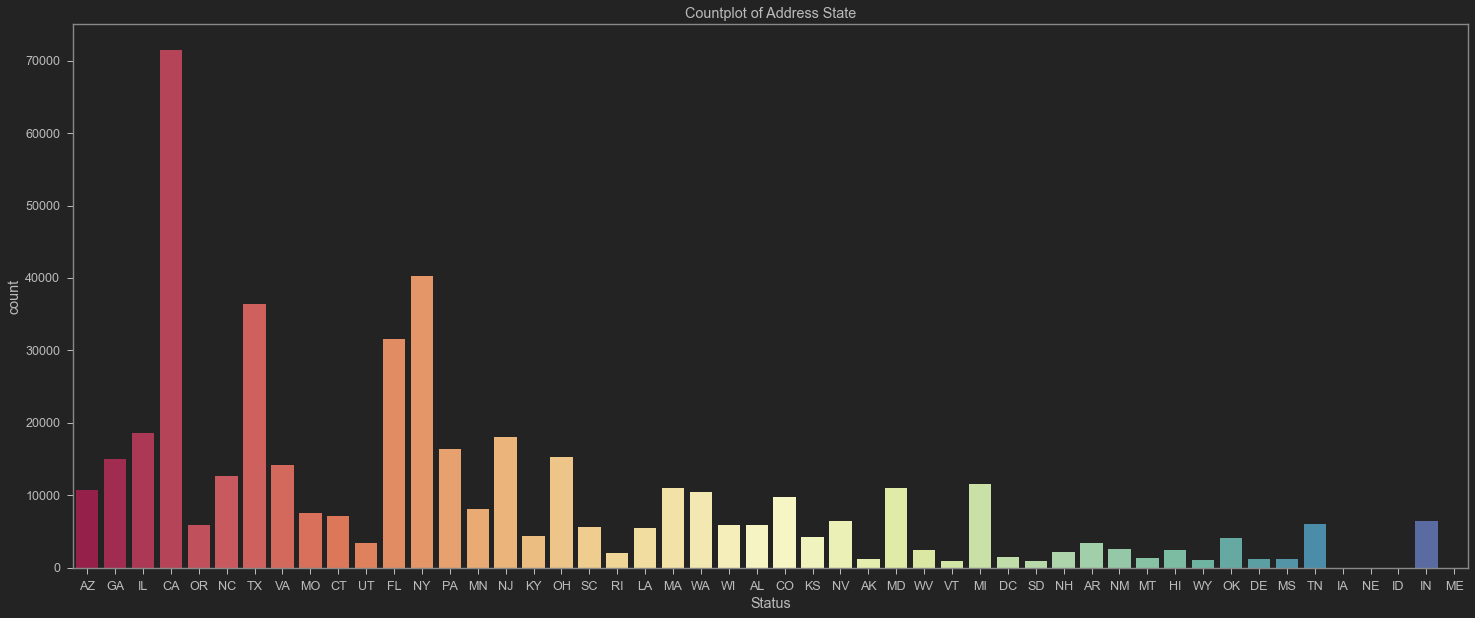

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(data.addr_state,palette='Spectral')
plt.title('Countplot of Address State')
plt.xlabel('Status')
plt.savefig("Countplot of Address State.png")
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


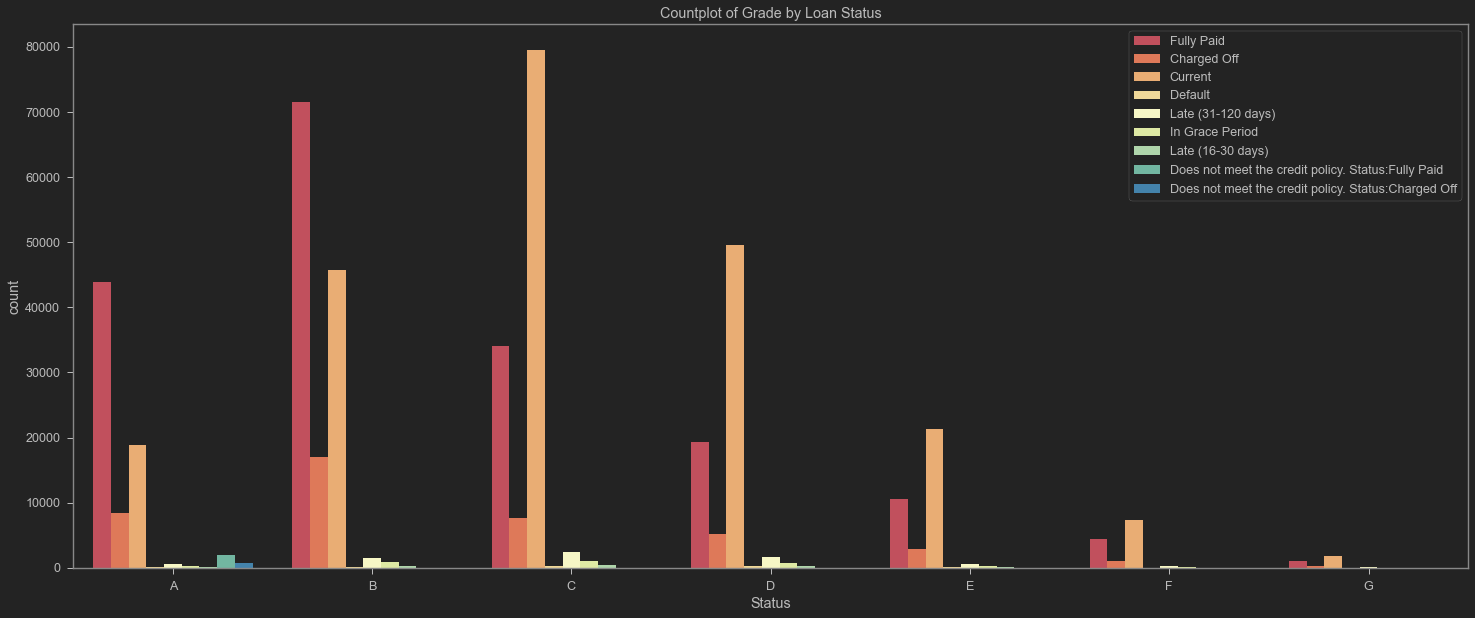

In [15]:
plt.figure(figsize=(25,10))
sns.countplot(sorted(data.grade),hue=data.loan_status,palette='Spectral')
plt.title('Countplot of Grade by Loan Status')
plt.xlabel('Status')
plt.legend(loc='upper right')
plt.savefig("Countplot of Grade by Loan Status.png")
plt.show()

# Make Machine Learning Model

In [16]:
# Change some string column to number status
data['loan_status'] = data['loan_status'].str.replace('Fully Paid','0')
data['loan_status'] = data['loan_status'].str.replace('Charged Off','1')
data['loan_status'] = data['loan_status'].str.replace('Current','2')
data['loan_status'] = data['loan_status'].str.replace('Default','3')
data['loan_status'] = data['loan_status'].str.replace('In Grace Period','5')
data['loan_status'] = data['loan_status'].str.replace('Does not meet the credit policy. Status:0','7', regex=True)
data['loan_status'] = data['loan_status'].str.replace('Does not meet the credit policy. Status:1','8', regex=True)
data['loan_status'] = data['loan_status'].str.replace('Late (31-120 days)','4', regex=False)
data['loan_status'] = data['loan_status'].str.replace('Late (16-30 days)','6', regex=False)
data['loan_status'] = data['loan_status'].astype(int)

data['grade'] = data['grade'].str.replace('A','0',regex=False)
data['grade'] = data['grade'].str.replace('B','1',regex=False)
data['grade'] = data['grade'].str.replace('C','2',regex=False)
data['grade'] = data['grade'].str.replace('D','3',regex=False)
data['grade'] = data['grade'].str.replace('E','4',regex=False)
data['grade'] = data['grade'].str.replace('F','5',regex=False)
data['grade'] = data['grade'].str.replace('G','6',regex=False)
data['grade'] = data['grade'].astype(int)

data['home_ownership'] = data['home_ownership'].str.replace('RENT','0',regex=False)
data['home_ownership'] = data['home_ownership'].str.replace('OWN','1',regex=False)
data['home_ownership'] = data['home_ownership'].str.replace('MORTGAGE','2',regex=False)
data['home_ownership'] = data['home_ownership'].str.replace('OTHER','3',regex=False)
data['home_ownership'] = data['home_ownership'].str.replace('NONE','4',regex=False)
data['home_ownership'] = data['home_ownership'].str.replace('ANY','5',regex=False)
data['home_ownership'] = data['home_ownership'].astype(int)

data['verification_status'] = data['verification_status'].str.replace('Verified','0',regex=False)
data['verification_status'] = data['verification_status'].str.replace('Source 0','1',regex=False)
data['verification_status'] = data['verification_status'].str.replace('Not 0','2',regex=False)
data['verification_status'] = data['verification_status'].astype(int)

data['pymnt_plan'] = data['pymnt_plan'].str.replace('n','0',regex=False)
data['pymnt_plan'] = data['pymnt_plan'].str.replace('y','1',regex=False)
data['pymnt_plan'] = data['pymnt_plan'].astype(int)

In [17]:
# New data
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,1,B2,Unknown,10,0,24000,0,Dec-11,0,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,34.10443,74.306012,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,-,Jan-16,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,2,C4,Ryder,1,0,30000,1,Dec-11,1,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,34.10443,74.306012,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,-,Sep-13,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,2,C5,Unknown,10,0,12252,2,Dec-11,0,0,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,34.10443,74.306012,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,-,Jan-16,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,2,C1,AIR RESOURCES BOARD,10,0,49200,1,Dec-11,0,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.00000,74.306012,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,-,Jan-15,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,1,B5,University Medical Group,1,0,80000,1,Dec-11,2,0,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.00000,74.306012,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0,42,1,INDIVIDUAL,NaN,NaN,NaN,0.0,191,138801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30379.087771,NaN,NaN,NaN


# Predict Probability and Test 5 ML Method

In [18]:
# Make X Y Train Test
X = data[['id','loan_amnt','funded_amnt','term','funded_amnt_inv','int_rate','installment','grade','emp_length','home_ownership','annual_inc','verification_status','pymnt_plan','dti',]]
y = data['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [19]:
# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [21]:
# # Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
rf_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [22]:
# # Gaussian Naive Bayes:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
gaussian_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [23]:
# # Perceptron
perceptron = Perceptron(max_iter=100000)
perceptron.fit(X_train, Y_train)
perceptron_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

In [24]:
# # Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
dt_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [25]:
# Result
results = pd.DataFrame({
    'Score': [acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree],
    'Model': ['Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree']
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
100.00,Random Forest
100.00,Decision Tree
62.09,Stochastic Gradient Decent
54.26,Perceptron
8.81,Naive Bayes


# Hasil
Dengan hasil yang sudah didapatkan, Random Forest dan Desicion Tree mendapatkan Score sebesar 95-100%. Maka karena itu saya akan memilih untuk memakai Desicion Tree sebagai hasil akhir.

Jika hasil dari prediksi memberikan angka 0 atau 2 maka loan bisa untuk diberikan kepada orang tersebut karena kemungkinan membayar sangat tinggi.
1. Untuk hasil '0' adalah Fully Paid
2. Untuk hasil '2' adalah Current

Itu menandakan bahwa sang peminjam membayar hutang dengan sehat dan tidak ada masalah saat proses hutang-piutang.

In [26]:
# Pembuktian bahwa akurasi hasil 0 dan 2 100% akurat dengan Y_test
pred_count = 0
y_test_count = 0
for x in dt_pred:
    if x == 0 or 2:
        pred_count += 1
        
for x in Y_test.values:
    if x == 0 or 2:
        y_test_count += 1
        
print(f'''Hasil penjumlahan yang mendapat izin pinjaman dari hasil prediksi adalah = {pred_count},
Sedangkan hasil penjumlahan yang mendapat izin pinjaman dari y_test adalah = {y_test_count}
Yang berarti jumlah sama antara hasil prediksi dengan data real dari y_test.''')

Hasil penjumlahan yang mendapat izin pinjaman dari hasil prediksi adalah = 139886,
Sedangkan hasil penjumlahan yang mendapat izin pinjaman dari y_test adalah = 139886
Yang berarti jumlah sama antara hasil prediksi dengan data real dari y_test.
